In [1]:
import numpy as np
import math
# import pandas as pd
import matplotlib.pyplot as plt
# import csv
# import os
%matplotlib inline

In [2]:
# def read_file(var0, column_number, file_path):
    
#     var = var0
    
#     with open(file_path) as f:
#         next(f)
#         for rows in f:
#             var.append( float(rows.split(',')[column_number]) )
            
            
#     return var

In [3]:
# read from file Gs

def read_files(file_root, file_names):

    G = [0] * len(file_names)
    r = []

    for i, fn in enumerate(file_names):

        file_path = file_root + f'{fn}.dat'

        G[i] = []
        with open(file_path) as f:
            next(f)
            for rows in f:
                G[i].append( float(rows.split(',')[1]) )
                
                if i == 0:
                    r.append( float(rows.split(',')[0]) )
        
    
    return r, G

In [4]:
file_root_Gs = f'data_out/Gs/'
file_root_G0 = f'data_out/G0/'

file_names = [
    '50', '100', '300', '500',
    '1000', '1500', '2000', '2500',
    '3000', '3500', '4000', '4500',
    '5000', '5500'
]

# print(len(Gs))
# print(len(Gs[0]))
# print(len(r))

In [5]:
def multiplier_Gs(r, G):
    
    I = len(G)

    G_mult = np.zeros_like(G)

    for i in range( I ):

        G_mult[i] = 4. * np.pi * r[i] * r[i] * G[i]
            
            
    return G_mult

In [6]:
def multiplier_G0(r, G):
    
    I = len(G)

    G_mult = np.zeros_like(G)

    for i in range( I ):

        G_mult[i] = 4. * np.pi * r[i] * r[i] * G[i]
            
            
    return G_mult

In [7]:
def average(r, G):
    
    G_mult_aver = np.zeros_like(r)
    J = len(G[0])

    transposed_G = zip(*G)
    G_aver = [sum(col) / len(col) for col in transposed_G]

    
    return G_aver

In [8]:
def microns_r(r, px_to_micron):
    
    r_micron = [i * px_to_micron for i in r]
    
    
    return r_micron

In [9]:
def microns_G0(G0, px_to_micron):
    
    G0_micron = [i * (px_to_micron * px_to_micron) for i in G0]
    
    
    return G0_micron

In [10]:
def microns_Gs(Gs, px_to_micron):
    
    Gs_micron = [i * (px_to_micron * px_to_micron) for i in Gs]
    
    
    return Gs_micron

In [11]:
# read files:

r, Gs = read_files(file_root_Gs, file_names)
r, G0 = read_files(file_root_G0, file_names)


# take an average:

Gs_aver = average(r, Gs)
G0_aver = average(r, G0)


# multiply by 4 * pi * r**2:

Gs_mult = multiplier_Gs(r, Gs_aver)
G0_mult = multiplier_G0(r, G0_aver)


# convert to miocrons:

px_to_micron = 0.06905
r_micron = microns_r(r, px_to_micron)
Gs_mult_micron = microns_Gs(Gs_mult, px_to_micron)
G0_mult_micron = microns_G0(G0_mult, px_to_micron)


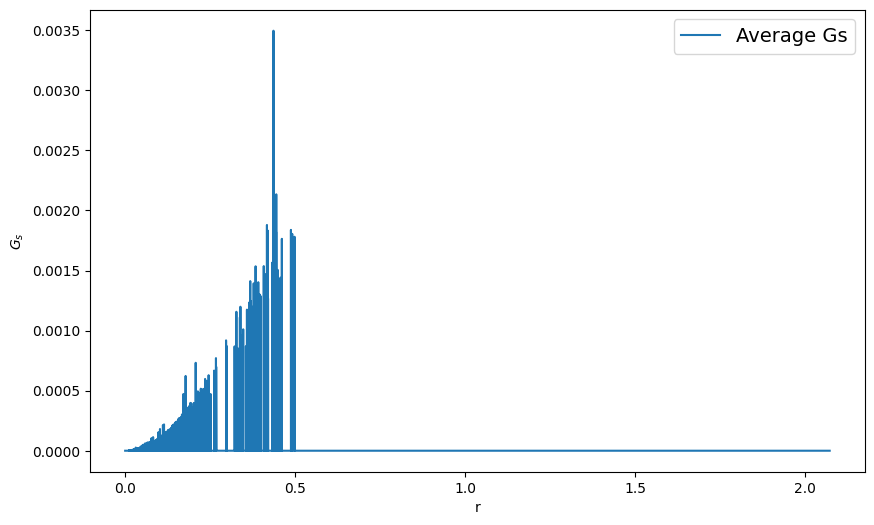

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))


# for i, fn in enumerate(file_names):
#     ax.plot(r, Gs_mult_sep[i], label=f'{fn}')
    
ax.plot(r_micron, Gs_mult_micron, ls='-', label='Average Gs')
# ax.plot(r_micron, G0_aver, ls='-', label='Average G0')
    
# ax.set_xscale('log')
# ax.set_yscale('log')

ax.set(xlabel='r',
       ylabel=r'$G_s$')
plt.legend (fontsize=14)

In [20]:
summa_G = sum(G0_aver)
print(summa_G)

1690.6512426007187


In [13]:
# # convert to microns
# px_to_micron = 0.06905
# r_micron = [i*px_to_micron for i in r]
# Gs_mult_aver_micron = [i*px_to_micron*px_to_micron for i in Gs_mult_aver]

In [14]:
# fig, ax = plt.subplots(figsize=(10, 6))


# ax.plot(r_micron, Gs_mult_aver_micron, ls='-', marker='*', label='Average')
    

# ax.set(xlabel='r',
#        ylabel=r'$G_s$')
# plt.legend (fontsize=14)